In [1]:
import sys
import torch
import torch.nn.functional as F
from torch.utils.data import Subset
from torchvision.utils import save_image
import torchvision.models as tvmodels
from torchvision import datasets, transforms

import segmentation_models_pytorch as smp

import numpy as np

import matplotlib.pyplot as plt

sys.path.insert(0, "../src")
import exlib
from exlib.explainers import *
from exlib.explainers.common import *
from exlib.modules import *
from exlib.datasets.abdomen_organs import *

In [2]:
DATA_DIR = "/home/antonxue/foo/data/abdomen_exlib/"
train_dataset = AbdomenOrgans(data_dir=DATA_DIR, split="train")
test_dataset = AbdomenOrgans(data_dir=DATA_DIR, split="test")

In [3]:
seg_model = AbdomenSegModel(in_channels=3, num_segments=4)
seg_model.eval()

cls_model = AbdomenClsModel(in_channels=3, num_classes=6)
cls_model.eval()

seg2cls_model = Seg2ClsWrapper(seg_model)
seg2cls_model.eval()
;

''

In [4]:
x, olabel, glabel = test_dataset[0]
X = torch.stack([x, x, x])
y_cls = cls_model(X)
y_seg = seg_model(X)
y_seg2cls = seg2cls_model(X)

y_cls.shape, y_seg.shape, y_seg2cls.shape

(torch.Size([3, 6]), torch.Size([3, 4, 384, 640]), torch.Size([3, 4]))

In [5]:
intg_cls = IntGradImageCls(cls_model)
intg_seg = IntGradImageSeg(seg_model)                       

lime_cls = LimeImageCls(cls_model)
lime_seg = LimeImageSeg(seg_model)

# lime_cls = LimeImageCls(cls_model)
# lime_seg = LimeImageSeg(seg_model)
# lime_cls_old = TorchImageLime(cls_model)

In [6]:
lime_seg.cls_model(X).shape

torch.Size([3, 4])

In [7]:
lime_cls_exp = lime_cls(X, t=[0,1,2])

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
lime_seg_exp = lime_seg(X, t=[0,1,2])

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
lime_cls_exp.attributions.shape, lime_seg_exp.attributions.shape

(torch.Size([3, 3, 384, 640]), torch.Size([3, 3, 384, 640]))

<Figure size 640x480 with 0 Axes>

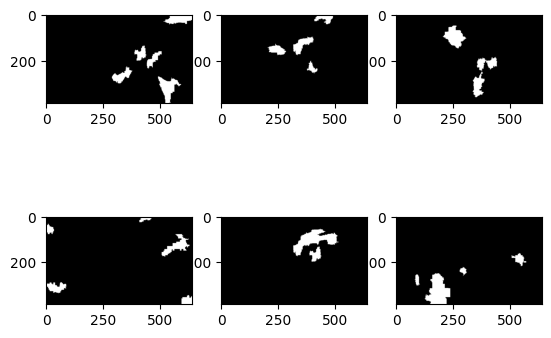

In [10]:
plt.figure()
fig, ax = plt.subplots(2,3)

ax[0,0].imshow(lime_cls_exp.attributions[0].numpy().transpose(1,2,0))
ax[0,1].imshow(lime_cls_exp.attributions[1].numpy().transpose(1,2,0))
ax[0,2].imshow(lime_cls_exp.attributions[2].numpy().transpose(1,2,0))

ax[1,0].imshow(lime_seg_exp.attributions[0].numpy().transpose(1,2,0))
ax[1,1].imshow(lime_seg_exp.attributions[1].numpy().transpose(1,2,0))
ax[1,2].imshow(lime_seg_exp.attributions[2].numpy().transpose(1,2,0))

In [7]:
lime_out = explain_image_cls_with_lime(cls_model, x, [0,1,2])

do collapse? False


  0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
lime_out.attributions.shape

torch.Size([3, 3, 384, 640])

<Figure size 640x480 with 0 Axes>

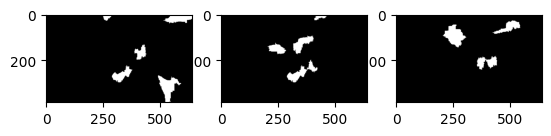

In [9]:
plt.figure()
fig, ax = plt.subplots(1,3)
ax[0].imshow(lime_out.attributions[0].numpy().transpose(1,2,0) * 1.0)
ax[1].imshow(lime_out.attributions[1].numpy().transpose(1,2,0) * 1.0)
ax[2].imshow(lime_out.attributions[2].numpy().transpose(1,2,0) * 1.0)

In [10]:
lime_out.attributions.view(3,-1).sort(dim=1).values

tensor([[0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.]])

In [11]:
lime_out.explainer_output.segments.shape

(384, 640)

In [11]:
intg_cls_exp = intg_cls(X, T=[0,1,2], progress_bar=True)

100%|██████████| 32/32 [00:00<00:00, 64.97it/s]


In [12]:
intg_seg_exp = intg_seg(X, T=[0,1,2], progress_bar=True)

100%|██████████| 32/32 [00:54<00:00,  1.70s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

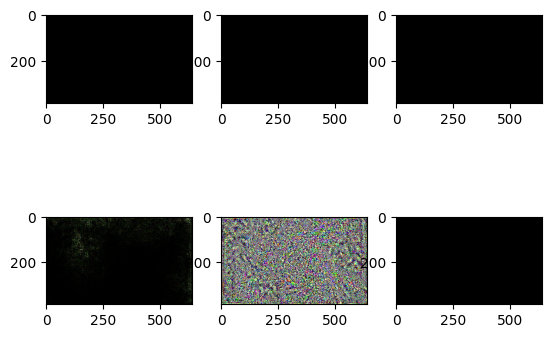

In [13]:
plt.figure()
fig, ax = plt.subplots(2,3)

ax[0,0].imshow(intg_cls_exp.attributions[0].numpy().transpose(1,2,0))
ax[0,1].imshow(intg_cls_exp.attributions[1].numpy().transpose(1,2,0))
ax[0,2].imshow(intg_cls_exp.attributions[2].numpy().transpose(1,2,0))

ax[1,0].imshow(intg_seg_exp.attributions[0].numpy().transpose(1,2,0))
ax[1,1].imshow(intg_seg_exp.attributions[1].numpy().transpose(1,2,0))
ax[1,2].imshow(intg_seg_exp.attributions[2].numpy().transpose(1,2,0))

In [14]:
intg_seg_exp.attributions.shape

torch.Size([3, 3, 384, 640])

In [9]:
################################################################################
################################################################################
################################################################################

ValueError: Only RGB images can be converted to Lab space.